In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Initial conditions
x_prev = 0
y_prev = 0
theta_prev = 0

# Speed of the vehicle
v = 1

# Time step
delta_t = 0.1

# Number of steps
n_steps = 100

# Lists to store the results
x_positions = [x_prev]
y_positions = [y_prev]
theta_values = [theta_prev]


In [3]:
for _ in range(n_steps):
    # Sample Δθ(t) from Gaussian(0, 1)
    # delta_theta_t = np.random.normal(0, 1)
    delta_theta_t = np.random.uniform(-np.pi/3, +np.pi/3)

    # Update theta(t)
    theta_t = theta_prev + delta_theta_t

    # Update x(t) and y(t)
    x_t = x_prev + v * np.cos(theta_t) * delta_t
    y_t = y_prev + v * np.sin(theta_t) * delta_t

    # Store the new values
    x_positions.append(x_t)
    y_positions.append(y_t)
    theta_values.append(theta_t)

    # Update the previous values
    x_prev, y_prev, theta_prev = x_t, y_t, theta_t


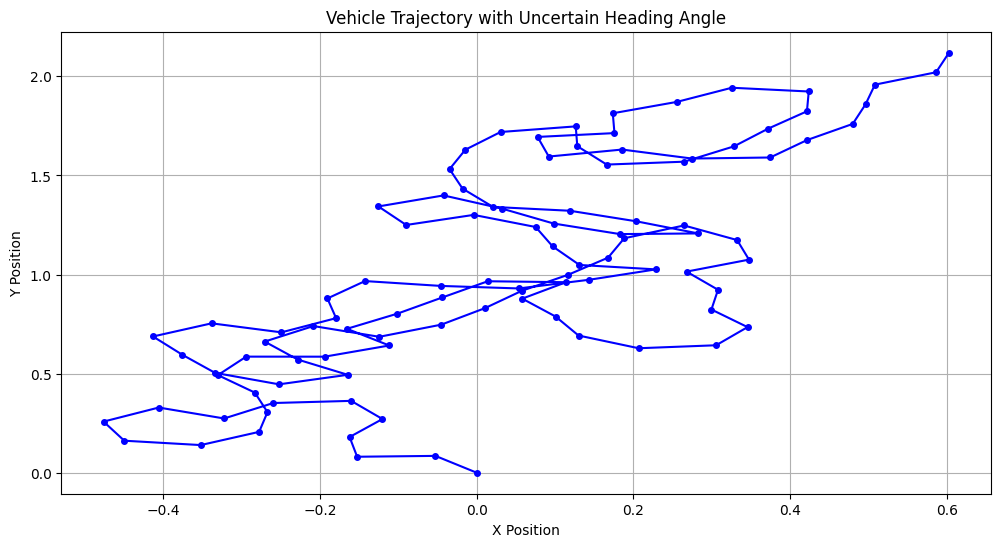

In [4]:
plt.figure(figsize=(12, 6))

# Plot the trajectory
plt.plot(x_positions, y_positions, marker='o', linestyle='-', color='blue', markersize=4)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Vehicle Trajectory with Uncertain Heading Angle')
plt.grid(True)
plt.show()


In [8]:
# Lists to store the distribution of positions at each step
x_distributions = [x_prev]
y_distributions = [y_prev]

for _ in range(n_steps):
    # Sample Δθ(t) from Gaussian(0, 1)
    # delta_theta_t = np.random.normal(0, 1, 1000)  # 1000 samples for the distribution
    delta_theta_t = np.random.uniform(-np.pi/3, +np.pi/3)
    print (delta_theta_t[0], delta_theta_t[1])
    print(theta_prev)
    # Update theta(t)
    theta_t = theta_prev + delta_theta_t
    print(theta_t[0],theta_t[1])
    # theta_t is a distribution
    
    # Update x(t) and y(t) for each sample
    x_t = x_prev + v * np.cos(theta_t) * delta_t
    y_t = y_prev + v * np.sin(theta_t) * delta_t

    # Store the distributions
    x_distributions.append(x_t)
    y_distributions.append(y_t)

    # Update the previous values to the mean of the current distributions
    x_prev = np.mean(x_t)
    y_prev = np.mean(y_t)
    theta_prev = np.mean(theta_t)


0.7390212498195614 -0.7244182507726541
14.288985716508275
15.028006966327837 13.564567465735621
-1.2964500209253167 0.2730782110051698
14.33383376079149
13.037383739866174 14.606911971796661
0.2264439753006559 -2.125782094768289
14.308091189363564
14.53453516466422 12.182309094595276
-1.8733096015199786 -1.180613259522379
14.301041232759374
12.427731631239396 13.120427973236994
0.16161239796755117 0.1219288227349639
14.287632164599438
14.449244562566989 14.409560987334402
-0.1270366569426747 -0.5440916003521905
14.286955799660563
14.159919142717888 13.742864199308372
0.42037960051249557 -2.1916549795695657
14.26371482217905
14.684094422691546 12.072059842609484
0.07501855677638868 -1.023358781699194
14.283573783185817
14.358592339962206 13.260215001486623
1.2408060758600044 -0.31335809759396216
14.267526183470764
15.508332259330768 13.954168085876802
0.26141487497621085 -0.12421107477799052
14.320117773076246
14.581532648052457 14.195906698298256
-0.24975863971525178 -0.364578152380194

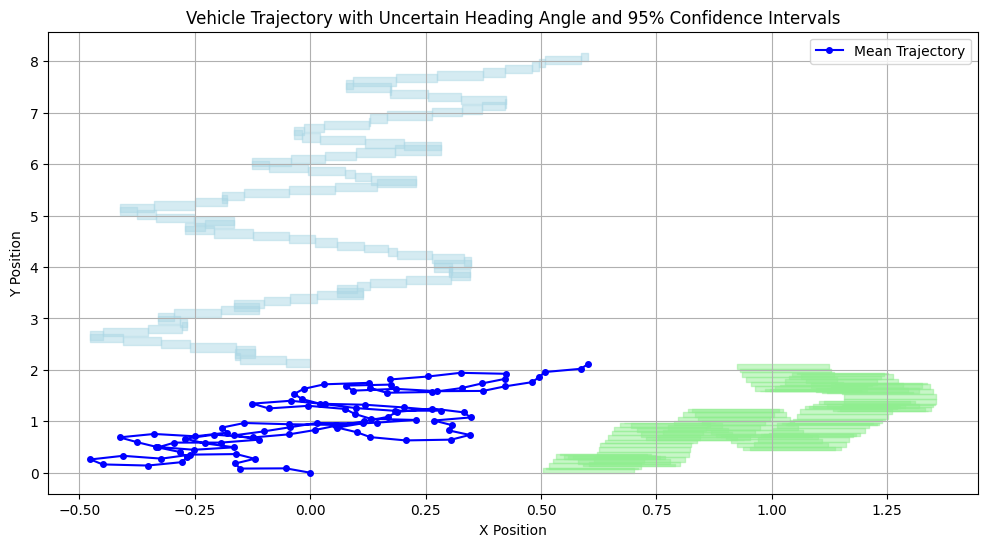

In [6]:
plt.figure(figsize=(12, 6))

# Plot the trajectory
plt.plot(x_positions, y_positions, marker='o', linestyle='-', color='blue', markersize=4, label='Mean Trajectory')

# Calculate and plot the 95% confidence intervals
for i in range(1, n_steps + 1):
    x_samples = x_distributions[i]
    y_samples = y_distributions[i]
    
    x_mean = np.mean(x_samples)
    y_mean = np.mean(y_samples)
    
    x_ci = np.percentile(x_samples, [2.5, 97.5])
    y_ci = np.percentile(y_samples, [2.5, 97.5])
    
    plt.fill_between([x_positions[i-1], x_positions[i]], [y_ci[0], y_ci[0]], [y_ci[1], y_ci[1]], color='lightblue', alpha=0.5)
    plt.fill_betweenx([y_positions[i-1], y_positions[i]], [x_ci[0], x_ci[0]], [x_ci[1], x_ci[1]], color='lightgreen', alpha=0.5)

plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Vehicle Trajectory with Uncertain Heading Angle and 95% Confidence Intervals')
plt.grid(True)
plt.legend()
plt.show()


Considering uniform change in heading angle initially; Forming the envelop for path only.

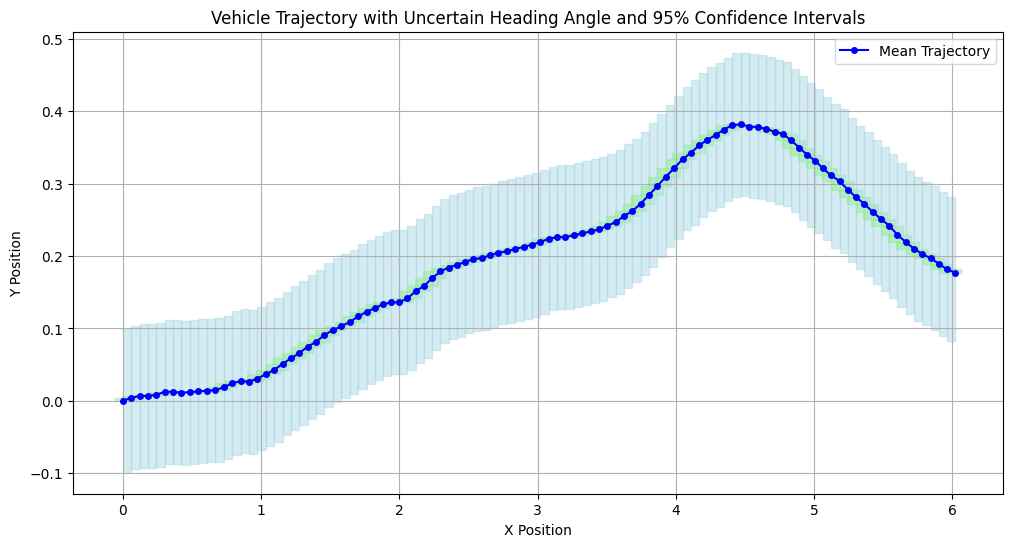

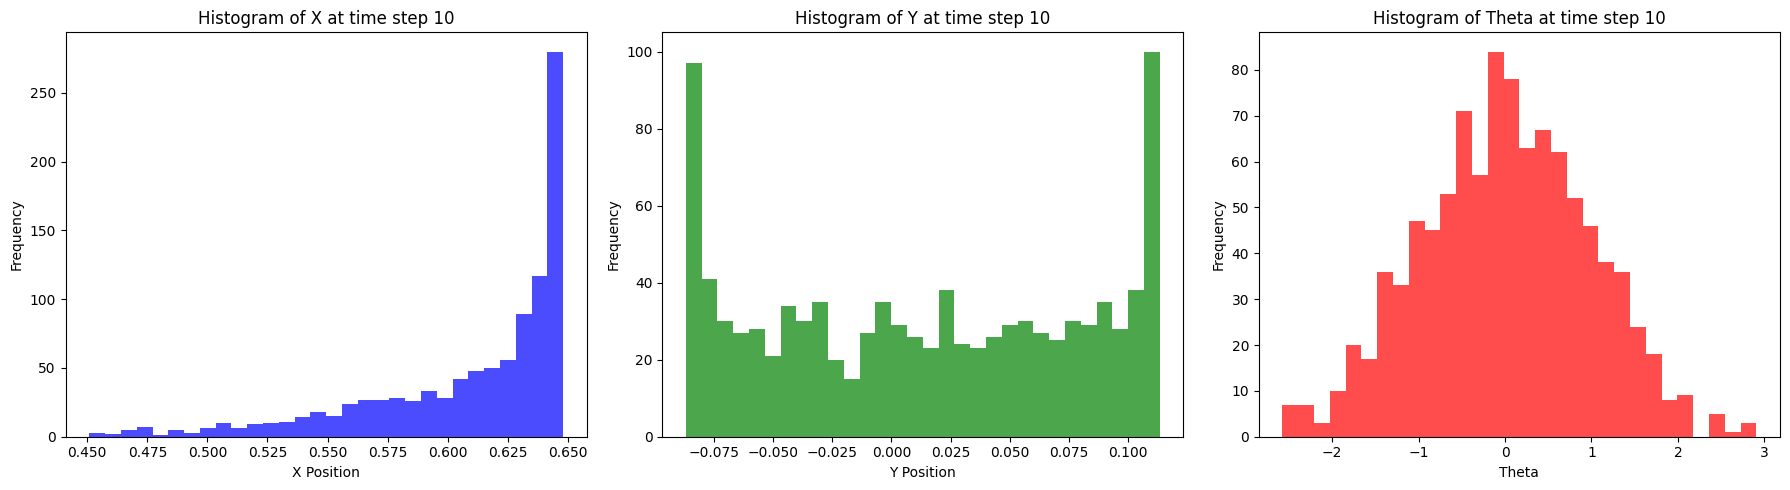

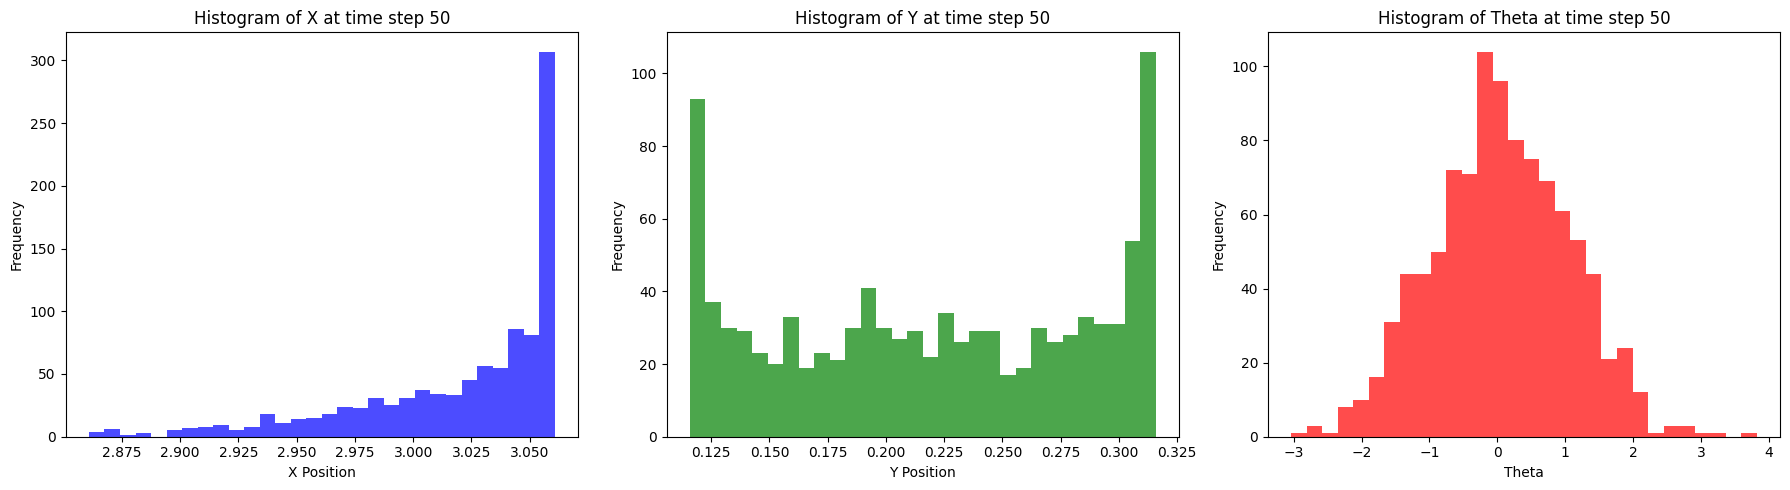

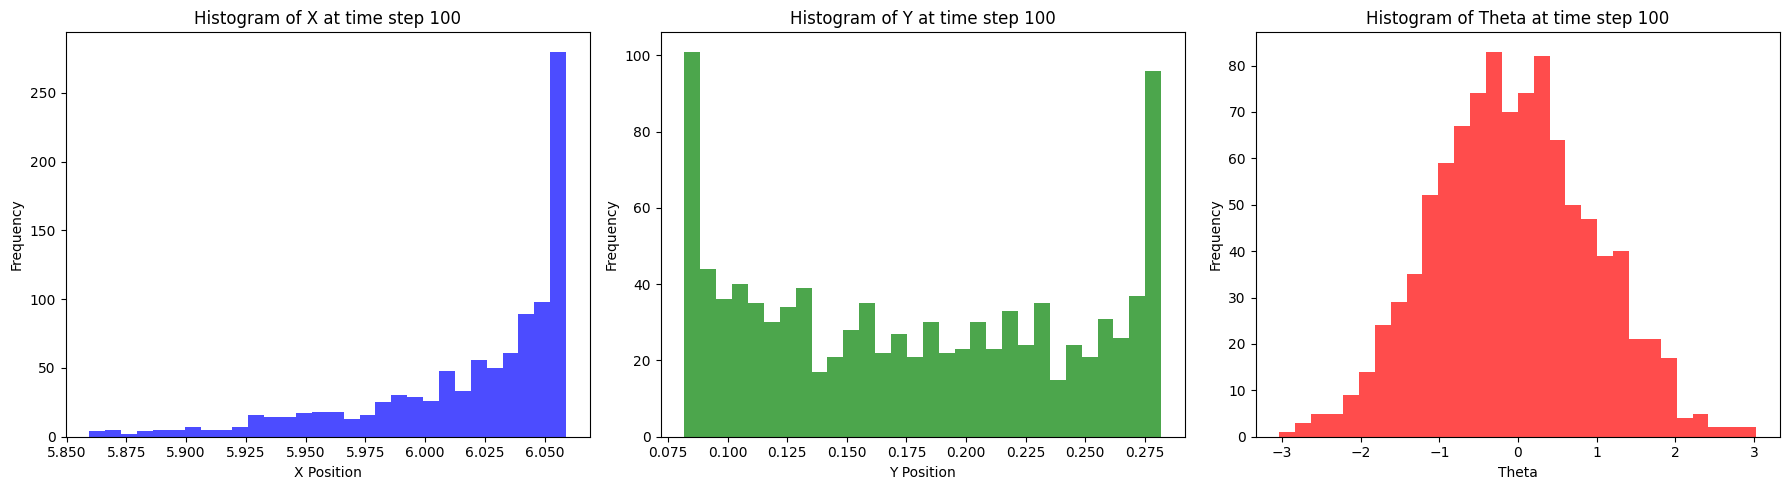

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Initial conditions
x_prev = 0
y_prev = 0
theta_prev = 0

# Speed of the vehicle
v = 1

# Time step
delta_t = 0.1

# Number of steps
n_steps = 100

# Lists to store the results
x_positions = [x_prev]
y_positions = [y_prev]
theta_values = [theta_prev]

# Lists to store the distribution of positions at each step
x_distributions = [x_prev]
y_distributions = [y_prev]
theta_distributions = [theta_prev]

for _ in range(n_steps):
    # Sample Δθ(t) from Gaussian(0, 1)
    # delta_theta_t = np.random.normal(0, 1, 1000)  # 1000 samples for the distribution
    delta_theta_t = np.random.uniform(-np.pi/3, +np.pi/3)
    # Update theta(t)
    theta_t = theta_prev + delta_theta_t

    # Update x(t) and y(t) for each sample
    x_t = x_prev + v * np.cos(theta_t) * delta_t
    y_t = y_prev + v * np.sin(theta_t) * delta_t

    # Store the distributions
    x_distributions.append(x_t)
    y_distributions.append(y_t)
    theta_distributions.append(theta_t)

    # Update the previous values to the mean of the current distributions
    x_prev = np.mean(x_t)
    y_prev = np.mean(y_t)
    theta_prev = np.mean(theta_t)

    # Store the mean positions and angles
    x_positions.append(x_prev)
    y_positions.append(y_prev)
    theta_values.append(theta_prev)

# Plot the trajectory with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(x_positions, y_positions, marker='o', linestyle='-', color='blue', markersize=4, label='Mean Trajectory')

# Calculate and plot the 95% confidence intervals
for i in range(1, n_steps + 1):
    x_samples = x_distributions[i]
    y_samples = y_distributions[i]
    
    x_mean = np.mean(x_samples)
    y_mean = np.mean(y_samples)
    
    x_ci = np.percentile(x_samples, [2.5, 97.5])
    y_ci = np.percentile(y_samples, [2.5, 97.5])
    
    plt.fill_between([x_positions[i-1], x_positions[i]], [y_ci[0], y_ci[0]], [y_ci[1], y_ci[1]], color='lightblue', alpha=0.5)
    plt.fill_betweenx([y_positions[i-1], y_positions[i]], [x_ci[0], x_ci[0]], [x_ci[1], x_ci[1]], color='lightgreen', alpha=0.5)

plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Vehicle Trajectory with Uncertain Heading Angle and 95% Confidence Intervals')
plt.grid(True)
plt.legend()
plt.show()

# Plot histograms of x, y, and theta at selected time instants
time_instants = [10, 50, 100]

for time_instant in time_instants:
    plt.figure(figsize=(18, 5))

    # Plot histogram of x at the given time instant
    plt.subplot(1, 3, 1)
    plt.hist(x_distributions[time_instant], bins=30, color='blue', alpha=0.7)
    plt.xlabel('X Position')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of X at time step {time_instant}')

    # Plot histogram of y at the given time instant
    plt.subplot(1, 3, 2)
    plt.hist(y_distributions[time_instant], bins=30, color='green', alpha=0.7)
    plt.xlabel('Y Position')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Y at time step {time_instant}')

    # Plot histogram of theta at the given time instant
    plt.subplot(1, 3, 3)
    plt.hist(theta_distributions[time_instant], bins=30, color='red', alpha=0.7)
    plt.xlabel('Theta')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Theta at time step {time_instant}')

    plt.tight_layout()
    plt.show()



Considering gaussian change in heading angle initially. Forming the envelop for path and heading angle.

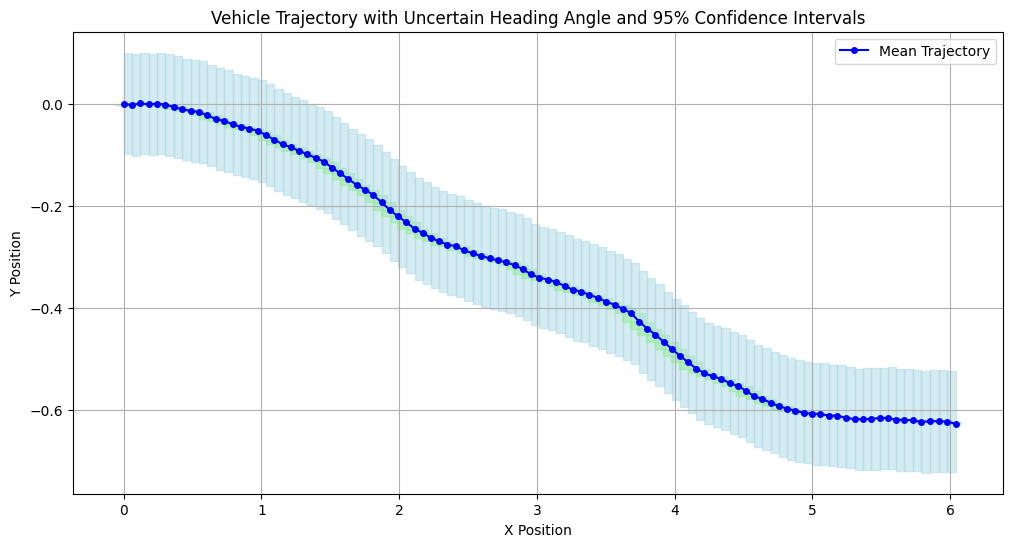

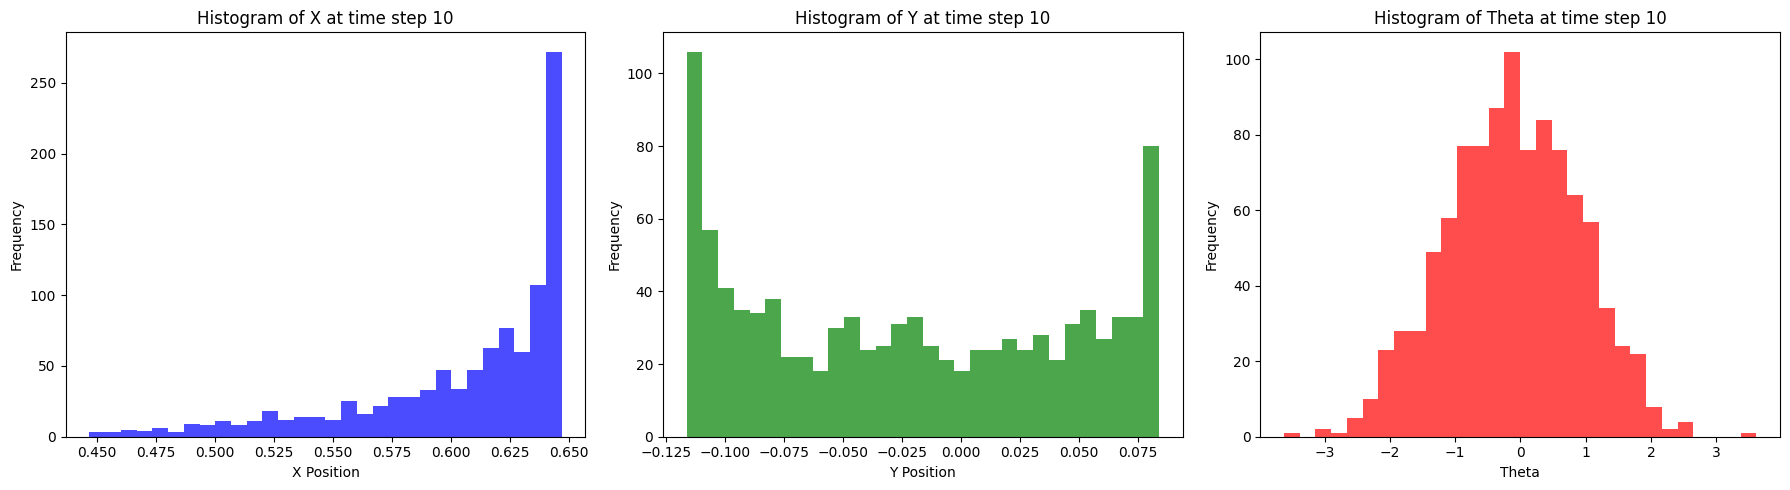

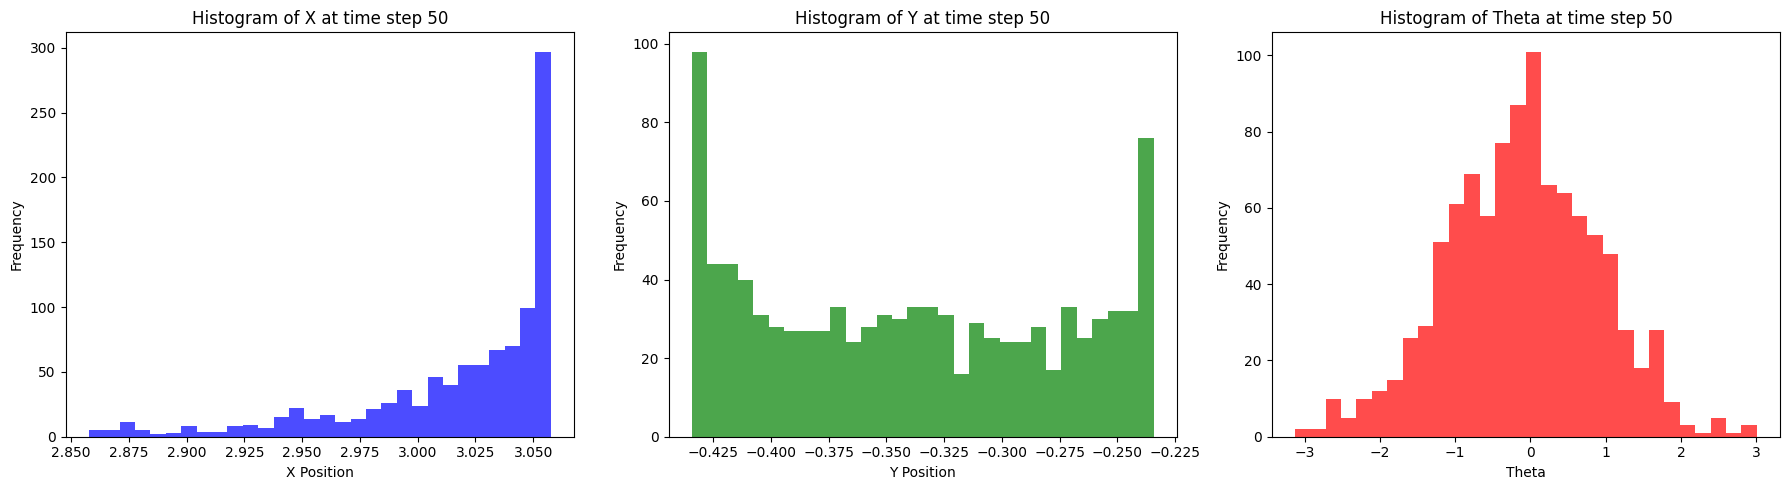

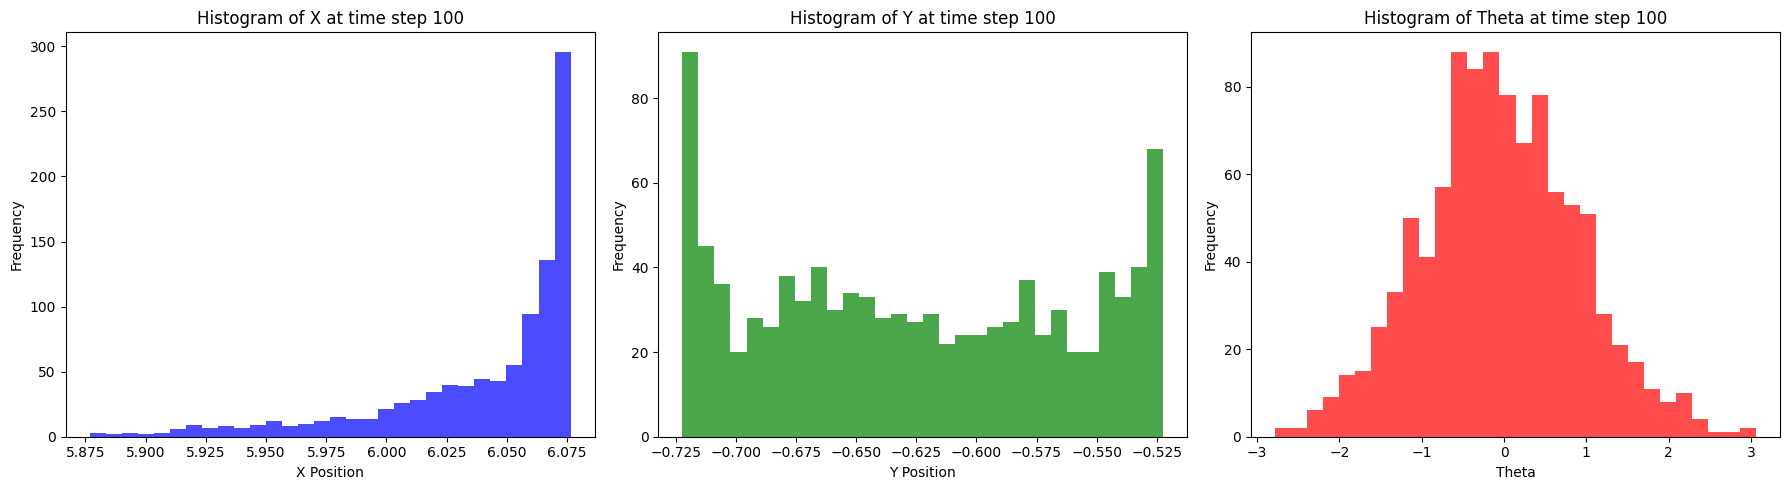

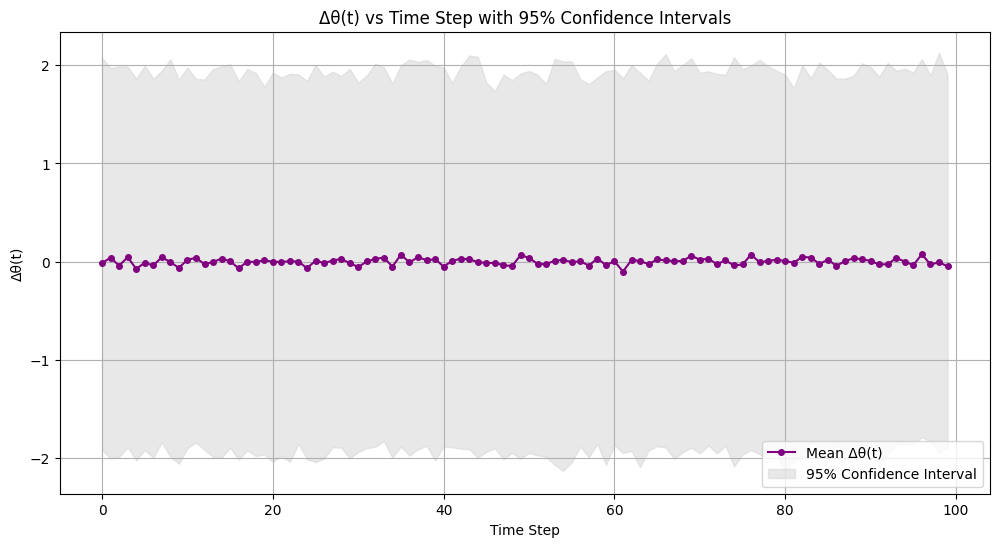

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Initial conditions
x_prev = 0
y_prev = 0
theta_prev = 0

# Speed of the vehicle
v = 1

# Time step
delta_t = 0.1

# Number of steps
n_steps = 100

# Lists to store the results
x_positions = [x_prev]
y_positions = [y_prev]
theta_values = [theta_prev]
delta_theta_values = []

# Lists to store the distribution of positions and delta_theta at each step
x_distributions = [x_prev]
y_distributions = [y_prev]
theta_distributions = [theta_prev]
delta_theta_distributions = []

for _ in range(n_steps):
    # Sample Δθ(t) from Gaussian(0, 1)
    delta_theta_t = np.random.normal(0, 1, 1000)  # 1000 samples for the distribution
    delta_theta_values.append(delta_theta_t)

    # Update theta(t)
    theta_t = theta_prev + delta_theta_t

    # Update x(t) and y(t) for each sample
    x_t = x_prev + v * np.cos(theta_t) * delta_t
    y_t = y_prev + v * np.sin(theta_t) * delta_t

    # Store the distributions
    x_distributions.append(x_t)
    y_distributions.append(y_t)
    theta_distributions.append(theta_t)
    delta_theta_distributions.append(delta_theta_t)

    # Update the previous values to the mean of the current distributions
    x_prev = np.mean(x_t)
    y_prev = np.mean(y_t)
    theta_prev = np.mean(theta_t)

    # Store the mean positions and angles
    x_positions.append(x_prev)
    y_positions.append(y_prev)
    theta_values.append(theta_prev)

# Plot the trajectory with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(x_positions, y_positions, marker='o', linestyle='-', color='blue', markersize=4, label='Mean Trajectory')

# Calculate and plot the 95% confidence intervals
for i in range(1, n_steps + 1):
    x_samples = x_distributions[i]
    y_samples = y_distributions[i]
    
    x_mean = np.mean(x_samples)
    y_mean = np.mean(y_samples)
    
    x_ci = np.percentile(x_samples, [2.5, 97.5])
    y_ci = np.percentile(y_samples, [2.5, 97.5])
    
    plt.fill_between([x_positions[i-1], x_positions[i]], [y_ci[0], y_ci[0]], [y_ci[1], y_ci[1]], color='lightblue', alpha=0.5)
    plt.fill_betweenx([y_positions[i-1], y_positions[i]], [x_ci[0], x_ci[0]], [x_ci[1], x_ci[1]], color='lightgreen', alpha=0.5)

plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Vehicle Trajectory with Uncertain Heading Angle and 95% Confidence Intervals')
plt.grid(True)
plt.legend()
plt.show()

# Plot histograms of x, y, and theta at selected time instants
time_instants = [10, 50, 100]

for time_instant in time_instants:
    plt.figure(figsize=(18, 5))

    # Plot histogram of x at the given time instant
    plt.subplot(1, 3, 1)
    plt.hist(x_distributions[time_instant], bins=30, color='blue', alpha=0.7)
    plt.xlabel('X Position')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of X at time step {time_instant}')

    # Plot histogram of y at the given time instant
    plt.subplot(1, 3, 2)
    plt.hist(y_distributions[time_instant], bins=30, color='green', alpha=0.7)
    plt.xlabel('Y Position')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Y at time step {time_instant}')

    # Plot histogram of theta at the given time instant
    plt.subplot(1, 3, 3)
    plt.hist(theta_distributions[time_instant], bins=30, color='red', alpha=0.7)
    plt.xlabel('Theta')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Theta at time step {time_instant}')

    plt.tight_layout()
    plt.show()

# Plot delta_theta(t) vs t with confidence intervals
mean_delta_theta = [np.mean(delta_theta) for delta_theta in delta_theta_values]
time_steps = np.arange(n_steps)

plt.figure(figsize=(12, 6))
plt.plot(time_steps, mean_delta_theta, marker='o', linestyle='-', color='purple', markersize=4, label='Mean Δθ(t)')

# Calculate and plot the 95% confidence intervals for Δθ(t)
lower_ci = []
upper_ci = []
for delta_theta in delta_theta_values:
    lower, upper = np.percentile(delta_theta, [2.5, 97.5])
    lower_ci.append(lower)
    upper_ci.append(upper)

plt.fill_between(time_steps, lower_ci, upper_ci, color='lightgrey', alpha=0.5, label='95% Confidence Interval')
plt.xlabel('Time Step')
plt.ylabel('Δθ(t)')
plt.title('Δθ(t) vs Time Step with 95% Confidence Intervals')
plt.legend()
plt.grid(True)
plt.show()


Considering uniform change in heading angle initially; Forming the envelop for path and heading angle.

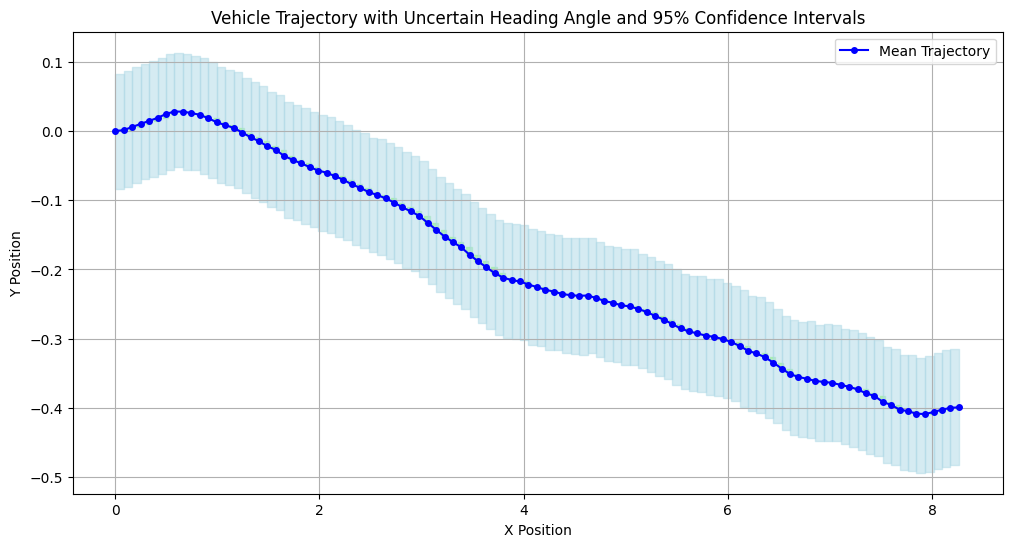

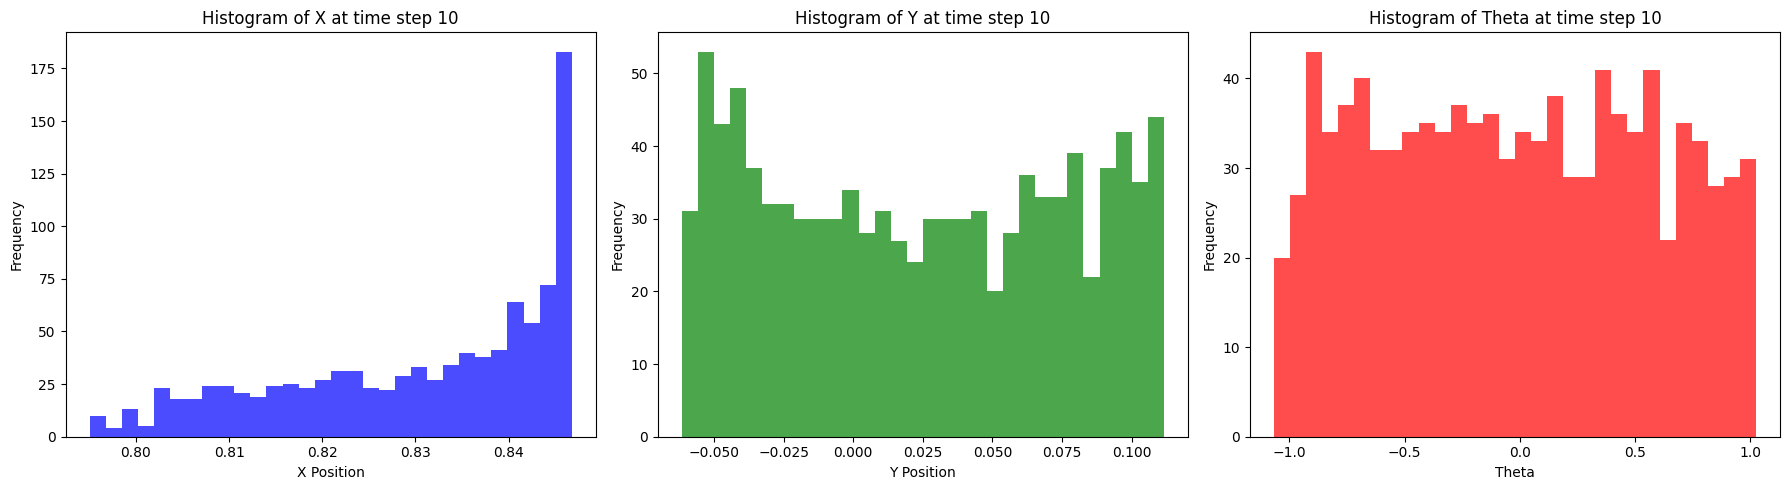

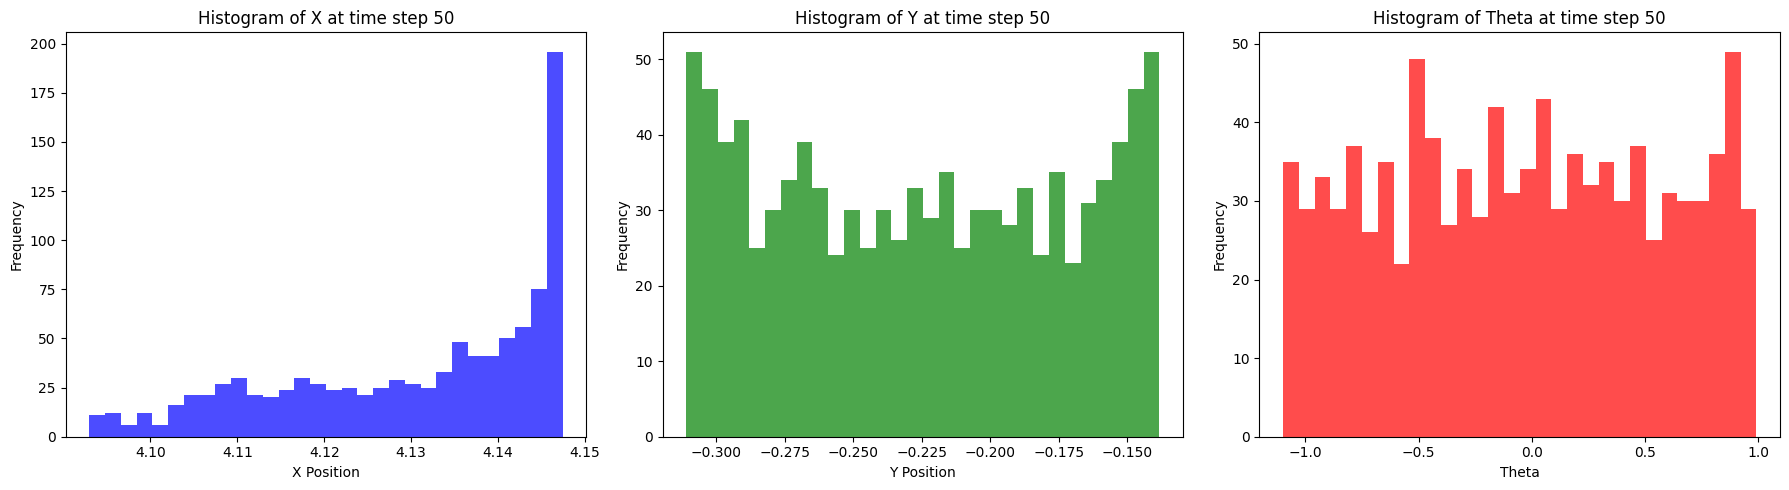

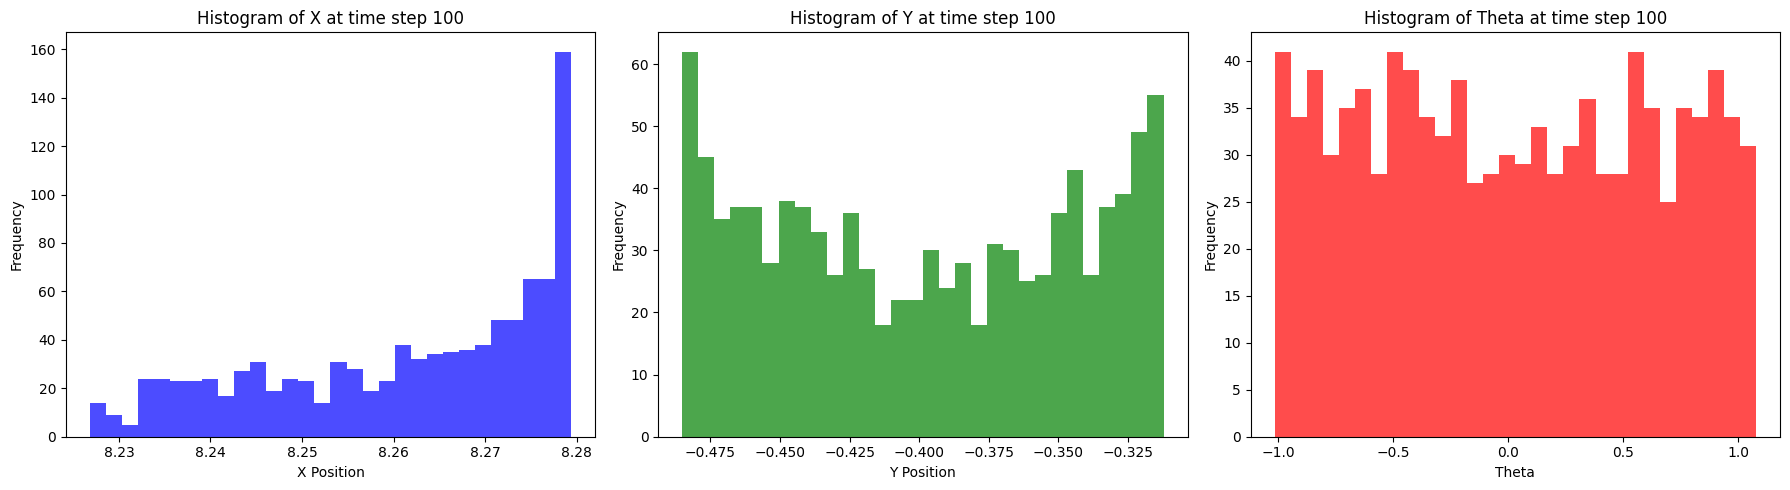

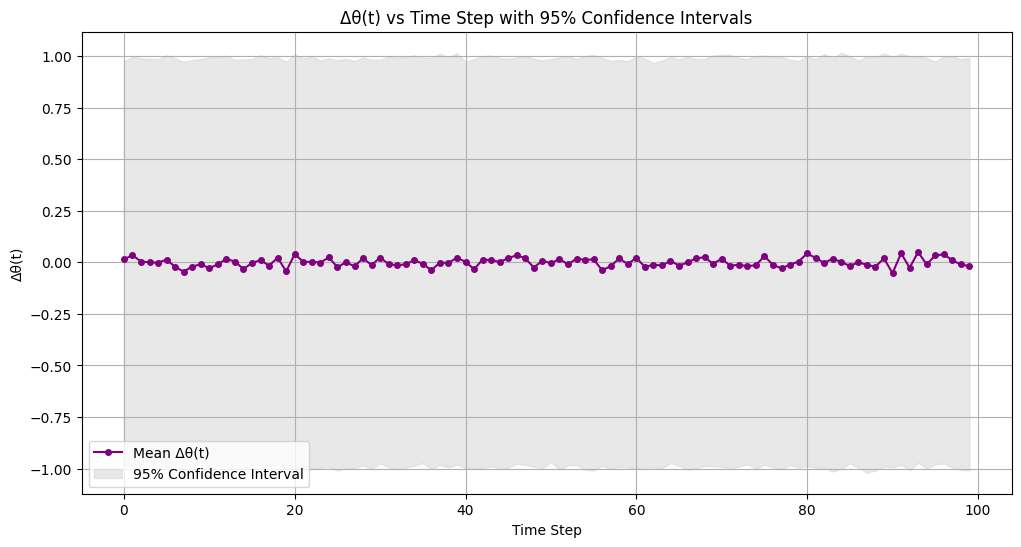

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Initial conditions
x_prev = 0
y_prev = 0
theta_prev = 0

# Speed of the vehicle
v = 1

# Time step
delta_t = 0.1

# Number of steps
n_steps = 100

# Number of samples for the distribution
n_samples = 1000

# Lists to store the results
x_positions = [x_prev]
y_positions = [y_prev]
theta_values = [theta_prev]

# Lists to store the distribution of positions and delta_theta at each step
x_distributions = [np.full(n_samples, x_prev)]
y_distributions = [np.full(n_samples, y_prev)]
theta_distributions = [np.full(n_samples, theta_prev)]
delta_theta_distributions = []

for _ in range(n_steps):
    # Sample Δθ(t) from Uniform(-π/3, π/3)
    delta_theta_t = np.random.uniform(-np.pi/3, np.pi/3, n_samples)  # n_samples for the distribution
    delta_theta_distributions.append(delta_theta_t)

    # Update theta(t) for each sample
    theta_t = theta_prev + delta_theta_t

    # Update x(t) and y(t) for each sample
    x_t = x_prev + v * np.cos(theta_t) * delta_t
    y_t = y_prev + v * np.sin(theta_t) * delta_t

    # Store the distributions
    x_distributions.append(x_t)
    y_distributions.append(y_t)
    theta_distributions.append(theta_t)

    # Update the previous values to the mean of the current distributions
    x_prev = np.mean(x_t)
    y_prev = np.mean(y_t)
    theta_prev = np.mean(theta_t)

    # Store the mean positions and angles
    x_positions.append(x_prev)
    y_positions.append(y_prev)
    theta_values.append(theta_prev)

# Plot the trajectory with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(x_positions, y_positions, marker='o', linestyle='-', color='blue', markersize=4, label='Mean Trajectory')

# Calculate and plot the 95% confidence intervals
for i in range(1, n_steps + 1):
    x_samples = x_distributions[i]
    y_samples = y_distributions[i]
    
    x_ci = np.percentile(x_samples, [2.5, 97.5])
    y_ci = np.percentile(y_samples, [2.5, 97.5])
    
    plt.fill_between([x_positions[i-1], x_positions[i]], [y_ci[0], y_ci[0]], [y_ci[1], y_ci[1]], color='lightblue', alpha=0.5)
    plt.fill_betweenx([y_positions[i-1], y_positions[i]], [x_ci[0], x_ci[0]], [x_ci[1], x_ci[1]], color='lightgreen', alpha=0.5)

plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Vehicle Trajectory with Uncertain Heading Angle and 95% Confidence Intervals')
plt.grid(True)
plt.legend()
plt.show()

# Plot histograms of x, y, and theta at selected time instants
time_instants = [10, 50, 100]

for time_instant in time_instants:
    plt.figure(figsize=(18, 5))

    # Plot histogram of x at the given time instant
    plt.subplot(1, 3, 1)
    plt.hist(x_distributions[time_instant], bins=30, color='blue', alpha=0.7)
    plt.xlabel('X Position')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of X at time step {time_instant}')

    # Plot histogram of y at the given time instant
    plt.subplot(1, 3, 2)
    plt.hist(y_distributions[time_instant], bins=30, color='green', alpha=0.7)
    plt.xlabel('Y Position')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Y at time step {time_instant}')

    # Plot histogram of theta at the given time instant
    plt.subplot(1, 3, 3)
    plt.hist(theta_distributions[time_instant], bins=30, color='red', alpha=0.7)
    plt.xlabel('Theta')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Theta at time step {time_instant}')

    plt.tight_layout()
    plt.show()

# Plot delta_theta(t) vs t with confidence intervals
mean_delta_theta = [np.mean(delta_theta) for delta_theta in delta_theta_distributions]
time_steps = np.arange(n_steps)

plt.figure(figsize=(12, 6))
plt.plot(time_steps, mean_delta_theta, marker='o', linestyle='-', color='purple', markersize=4, label='Mean Δθ(t)')

# Calculate and plot the 95% confidence intervals for Δθ(t)
lower_ci = []
upper_ci = []
for delta_theta in delta_theta_distributions:
    lower, upper = np.percentile(delta_theta, [2.5, 97.5])
    lower_ci.append(lower)
    upper_ci.append(upper)

plt.fill_between(time_steps, lower_ci, upper_ci, color='lightgrey', alpha=0.5, label='95% Confidence Interval')
plt.xlabel('Time Step')
plt.ylabel('Δθ(t)')
plt.title('Δθ(t) vs Time Step with 95% Confidence Intervals')
plt.legend()
plt.grid(True)
plt.show()
